<a href="https://colab.research.google.com/github/physicalcodescooker/Virtual_Maze_Solver/blob/main/Virtual_maze_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

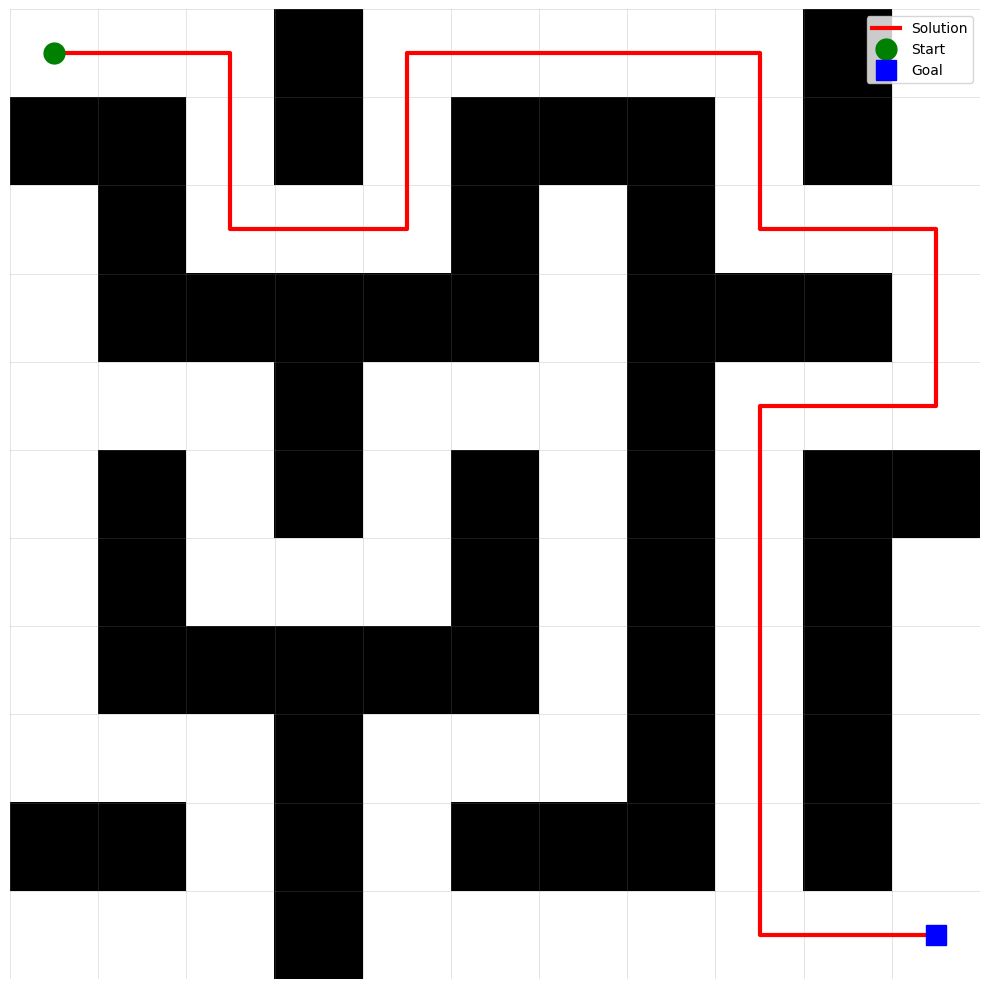

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Maze generating Function
def generate_maze(rows, columns):

    # Creating a grid
    maze = np.ones((rows, columns))

    # Start point as at top-left corner
    start_r, start_c = 0, 0

    # Constraint point = 1, Trasversal point = 0
    maze[start_r, start_c] = 0

    stack = [(start_r, start_c)]        # Memory of path

    # Direction vectors: Right, Left, Down, Up
    directions = np.array([(0, 2), (0, -2), (2, 0), (-2, 0)])

    while stack:
        r, c = stack[-1]  # Current cell

        # Calculate all potential neighbor nodes
        current_pos = np.array([r, c])
        neighbor_positions = current_pos + directions

        # Filter valid unvisited nodes
        valid_neighbors = []
        for nr, nc in neighbor_positions:
            if 0 <= nr < rows and 0 <= nc < columns and maze[nr, nc] == 1:
                valid_neighbors.append((nr, nc))

        if valid_neighbors:
            # Picking a random unvisited neighbor node
            idx = np.random.randint(len(valid_neighbors))
            nr, nc = valid_neighbors[idx]


            wall_r = (r + nr) // 2
            wall_c = (c + nc) // 2
            maze[wall_r, wall_c] = 0

            # Mark node as path
            maze[nr, nc] = 0

            # Trasverse to node
            stack.append((nr, nc))
        else:
            # if dead end: backtracking
            stack.pop()

    return maze

# Maze solving
def solve_maze(maze, start=(0, 0), goal=None):
    rows, columns = maze.shape

    # Default goal: bottom-right corner
    if goal is None:
        goal = (rows - 1, columns - 1)

    # Stack stores: (current_position, path_to_current)
    stack = [(start, [start])]
    visited = np.zeros((rows, columns), dtype=bool)

    directions = np.array([(0, 1), (1, 0), (0, -1), (-1, 0)])

    while stack:
        (r, c), path = stack.pop()

        if (r, c) == goal:
            return np.array(path)

        # if already visited we skip
        if visited[r, c]:
            continue
        visited[r, c] = True

       # nodes in the neighbourhood
        current_pos = np.array([r, c])
        neighbor_positions = current_pos + directions

        # Explore neighbors
        for nr, nc in neighbor_positions:
            # Check if neighbor is valid and walkable
            if (0 <= nr < rows and 0 <= nc < columns and
                maze[nr, nc] == 0 and not visited[nr, nc]):
                # Add neighbor to stack with updated path
                stack.append(((nr, nc), path + [(nr, nc)]))

    # if No path found
    return None

def draw_maze(maze, path=None):

    rows, columns = maze.shape

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, columns)
    ax.set_ylim(0, rows)
    ax.set_aspect('equal')
    ax.invert_yaxis()  # (0,0) at top-left

    maze_img = np.ones((rows, columns, 3))
    maze_img[maze == 1] = [0, 0, 0]  # Walls = black
    maze_img[maze == 0] = [1, 1, 1]  # Paths = white

    ax.imshow(maze_img, extent=[0, columns, rows, 0], interpolation='nearest')

    # Draw grid lines
    for i in range(rows + 1):
        ax.axhline(i, color='gray', linewidth=0.5, alpha=0.3)
    for j in range(columns + 1):
        ax.axvline(j, color='gray', linewidth=0.5, alpha=0.3)

    # Draw solution path (red)
    if path is not None and len(path) > 0:
        # Extract columns for plotting
        path_cols = path[:, 1] + 0.5
        path_rows = path[:, 0] + 0.5

        ax.plot(path_cols, path_rows, 'r-', linewidth=3, label='Solution')

        # Mark start (green) and goal (blue)
        ax.plot(path_cols[0], path_rows[0], 'go', markersize=15, label='Start')
        ax.plot(path_cols[-1], path_rows[-1], 'bs', markersize=15, label='Goal')
        ax.legend()

    ax.axis('off')
    plt.tight_layout()
    plt.show()


# Set random seed for reproducibility
np.random.seed(42)
m = generate_maze(11,11)
path = solve_maze(m)
draw_maze(m, path)